# Dimensionality reduction of Wisconsin Breast Cancer dataset using principal component analysis

We apply PCA to the UCI Wisconsin breast cancer database dataset. 

Datasset URL: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
(dataset also abailable via sklearn).

The dataset contains labelled data: Diagnosis = B for benign and M for malignant 10.

The UCI website describes it as containing 10 real-valued features relating to cell nuclei obtained from the biopsy:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)
    
Further derived features (mean, standard error, and "worst" i.e. mean of the three largest values) are obtained from the above giving a total of 30 features.

(Section 3 Exploratory data analysis is a duplicate of similar section in my github repo https://github.com/s-miller/Breast-cancer-biopsy-diagnosis-using-SVM-classifier.git which uses the same dataset.)

## 1) Import libraries

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2) Get data

In [72]:
from sklearn.datasets import load_breast_cancer

In [73]:
cancer = load_breast_cancer()

## 3) Exploratory data analysis

In [74]:
type(cancer)

sklearn.datasets.base.Bunch

From the above we see that the sklearn version of the dataset exists as a base.Bunch - a 'dictionary-like' format.
We can see parent level elements using .keys()... 

In [75]:
cancer.keys()

dict_keys(['DESCR', 'target', 'data', 'feature_names', 'target_names'])

We can access the keys using typical pandas referencing...

In [76]:
cancer['target_names']

array(['malignant', 'benign'], 
      dtype='<U9')

, or using shortcut (if no spaces present)...

In [77]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

Let's look at the dataset by means of the keys...

In [78]:
cancer.keys() 

dict_keys(['DESCR', 'target', 'data', 'feature_names', 'target_names'])

We wrap each key with print() function to display info nicely...

In [79]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [80]:
print(cancer['data'])

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [81]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [82]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [83]:
print(cancer['target_names'])

['malignant' 'benign']


From the above we would assume that malignant = 0 and benign = 1.  (This info isn't explicitly stated in dataset description.)  Let's verify.  We know from description that there are that there are 357 benign cases.  If benign =1, then summing the target variables will give us 357.  Let's confirm this is the case...

In [84]:
sum(cancer.target)

357

Let's create a dataframe for the dataset feature variables (leaving out the target data) ...

In [85]:
df = pd.DataFrame(cancer.data, columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Questions:**

    Which of our 30 components are the most important ones?
    Can we reduce our data to two dimensions so that we can visualise it?

** Approach: ** 

    1. scaling 
    2. PCA  

** Essentially the same process for each of the above two steps: ** 

    i) import 
    ii) instantiate 
    iii) fit 
    iv) transform 

### 1) SCALING

In [86]:
from sklearn.preprocessing import StandardScaler  # Import

In [87]:
scaler = StandardScaler() # Instantiate

In [88]:
scaler.fit(df) # Fit

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
scaled_data = scaler.transform(df) # Transform

### 2) PCA

In [90]:
from sklearn.decomposition import PCA  # Import

In [91]:
pca = PCA(n_components=2)  # Instantiate

In [92]:
pca.fit(scaled_data)  # Fit

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
X_pca = pca.transform(scaled_data)  # Transform

Note: sklearn offers *.fit\_transform()* for many of its methods (including PCA) so that you have the option of less verbose code where you are fitting and transforming on exactly the same data.

We can confirm the reduction in our data dimensions...

In [45]:
scaled_data.shape

(569, 30)

In [46]:
X_pca.shape

(569, 2)

Let's check data types of PCA output...

In [47]:
type(X_pca), type(X_pca[0])

(numpy.ndarray, numpy.ndarray)

Let's visualise our dataset in our reduced dimensions...

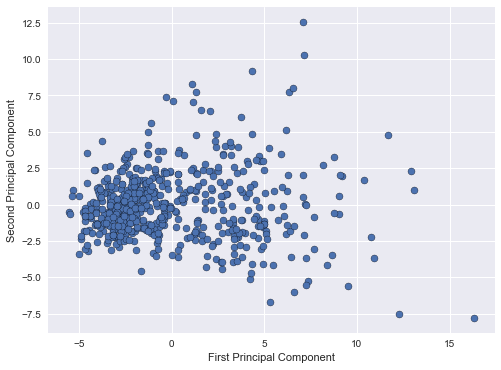

In [48]:
plt.figure(figsize=(8,6))
#plt.scatter(X_pca[:,0],X_pca[:,1], c=cancer['target'],edgecolor='black')
plt.scatter(X_pca[:,0],X_pca[:,1], edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Let's try mapping our two target categories onto these datapoints ...<br>
(NB _cmap='plasma'_ gives us a better colour scheme to visualise the 2 markers than the default)

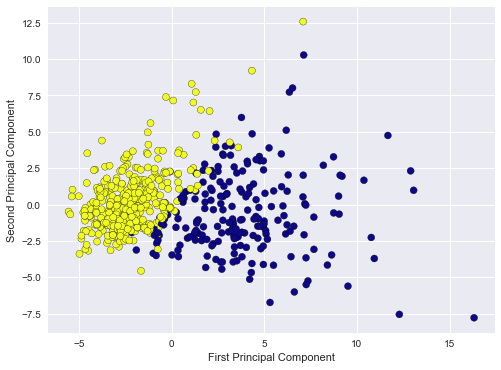

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c=cancer['target'],edgecolor='black', cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

From the above, it looks like we may be able to separate our PCA-transformed data by target class, so we could input the PCA data into for example, an SVM and we may be able to predict class in this way. 

Note: In PCA components don't correspond directly to particular features (it's not just a process of eliminating less relevant features) they correspond to combinations of features.

More specifically, we are performing _feature extraction_ rather than _feature selection_.

We can get a sense of how important each of the individual features is to our reduced dimension  representation by looking at the two components...

In [49]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Easier to see if we put into a dataframe...

In [50]:
df_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [62]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In fact, let's visualise this with a heatmap to make it easier to appreciate...

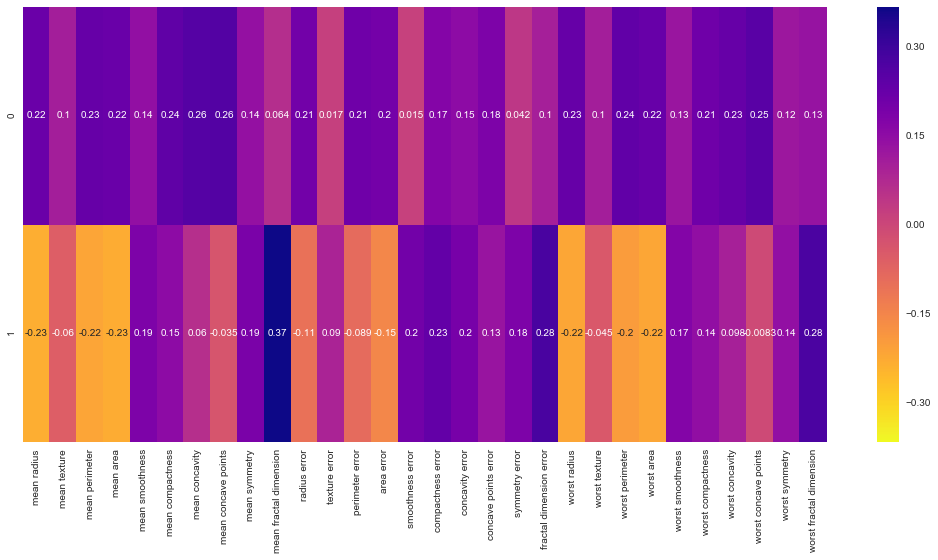

In [56]:
plt.figure(figsize=(18,8))
sns.heatmap(df_components,cmap='plasma_r', annot=True) # _r to reverse the cmap

From the above heatmap it seems that features relating to concavity seem to be particularly important in the first principal component, and therefore in explaining variance.

Fractal dimension features seem to play an important part in the second component.

From the perspective of explaining variance, we can instantiate our PCA object leaving _n_components_ with default value of _none_...which actually means all components are returned (rather than reduced to specified argument).  This means all components are returned in sorted order. 

In [68]:
pca = PCA() # Instantiate

In [69]:
pca.fit_transform(scaled_data) # Fit and transform in one step

array([[  9.19283683e+00,   1.94858307e+00,  -1.12316616e+00, ...,
         -3.39144536e-02,   4.56477199e-02,  -4.71692081e-02],
       [  2.38780180e+00,  -3.76817174e+00,  -5.29292687e-01, ...,
          3.26241827e-02,  -5.68742432e-03,  -1.86787626e-03],
       [  5.73389628e+00,  -1.07517380e+00,  -5.51747593e-01, ...,
          4.70258247e-02,   3.14589659e-03,   7.50534755e-04],
       ..., 
       [  1.25617928e+00,  -1.90229671e+00,   5.62730526e-01, ...,
         -2.57775589e-03,   6.70621179e-03,   3.77041667e-03],
       [  1.03747941e+01,   1.67201011e+00,  -1.87702933e+00, ...,
         -6.80863833e-02,  -8.41632764e-02,  -2.37828222e-02],
       [ -5.47524330e+00,  -6.70636791e-01,   1.49044308e+00, ...,
         -9.51587894e-03,  -6.09131090e-02,  -1.94755854e-02]])

In [70]:
pca.explained_variance_ratio_  

array([  4.42720256e-01,   1.89711820e-01,   9.39316326e-02,
         6.60213492e-02,   5.49576849e-02,   4.02452204e-02,
         2.25073371e-02,   1.58872380e-02,   1.38964937e-02,
         1.16897819e-02,   9.79718988e-03,   8.70537901e-03,
         8.04524987e-03,   5.23365745e-03,   3.13783217e-03,
         2.66209337e-03,   1.97996793e-03,   1.75395945e-03,
         1.64925306e-03,   1.03864675e-03,   9.99096464e-04,
         9.14646751e-04,   8.11361259e-04,   6.01833567e-04,
         5.16042379e-04,   2.72587995e-04,   2.30015463e-04,
         5.29779290e-05,   2.49601032e-05,   4.43482743e-06])

From the above we can see that:
    
    the first component explains 0.44 of the variance
    the second component explains 0.07 of the variance
    (the third component explains 0.02 of the variance)